In [25]:
from pymarketng.application.Mechanism import Average_Mechanism, Macafee_mechanism, TradeReduction_mechanism, VCG_Mechanism
from pymarketng.application.BidManager import BidManager
from pymarketng.application.Plot import plot_demand_curves, plot_trades_as_graph

from pymarketng.domain.Bid import Bid
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime
%matplotlib inline


In [47]:
# 1 Round of auction dataframe
n = 100
data = {
    "user": np.random.randint(1, 21, n),
    "type": np.random.randint(1, 4, n),
    "unit": np.random.randint(1, 100, n),
    "price": np.random.randint(0, 200, n),
    "buying": np.random.choice([True, False], n) ,
    "time": sorted([
        datetime.datetime(
            2022,
            np.random.randint(1, 13),
            np.random.randint(1, 28),
            np.random.randint(0, 24),
            np.random.randint(0, 60),
            np.random.randint(0, 60),
        )
        for _ in range(n)
    ]),
}
df = pd.DataFrame(data)
df

,user,type,unit,price,buying,time
0,8,1,8,160,True,2022-01-05 14:29:51
1,12,3,8,172,False,2022-01-10 19:43:32
2,4,3,3,113,True,2022-01-11 03:31:00
3,9,3,9,164,False,2022-01-13 04:10:29
4,17,1,10,59,True,2022-01-13 23:28:12
...,...,...,...,...,...,...
95,5,2,60,139,False,2022-12-20 20:03:55
96,9,1,89,92,False,2022-12-21 13:06:10
97,13,2,64,99,False,2022-12-22 09:34:26
98,14,2,13,2,False,2022-12-24 16:46:37


In [53]:
bm = BidManager()

# create bids from df
for index, row in df.iterrows():
    bm.add_bid(Bid(row["price"],row["user"],row["unit"],row["buying"],row["time"]))

bm.get_df()

,quantity,price,user,buying,time,divisible
0,8,160,8,True,2022-01-05 14:29:51,True
1,3,113,4,True,2022-01-11 03:31:00,True
2,10,59,17,True,2022-01-13 23:28:12,True
3,59,50,15,True,2022-01-17 02:57:29,True
4,66,66,13,True,2022-01-24 09:23:15,True
...,...,...,...,...,...,...
95,81,165,13,False,2022-12-14 00:24:59,True
96,60,139,5,False,2022-12-20 20:03:55,True
97,89,92,9,False,2022-12-21 13:06:10,True
98,64,99,13,False,2022-12-22 09:34:26,True


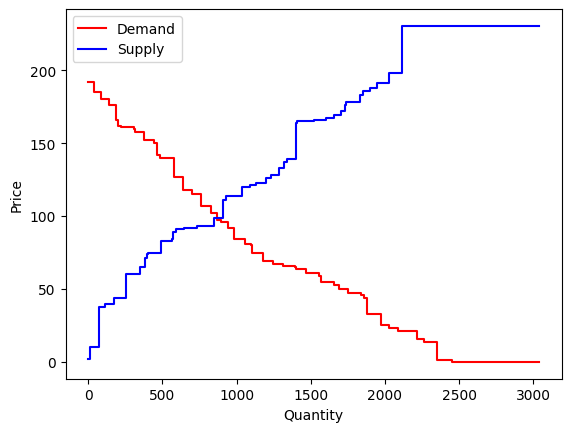

In [55]:
bm.plot()